## Introduction
In this project, I will analyze the top words in titles and make predictions upvotes based on the words in titiles.
## Table of contents
1. [Exploratory Data Analysis](#paragraph1)
    1. [Describe columns](#subparagraph1)
    2. [Find titles with top 20 upvotes](#subparagraph2)
    3. [WordCloud for title words](#subparagraph3)
    4. [Top 20 title words](#subparagraph4)
2. [Modeling](#paragraph2)
    1. [Text processing: TF-IDF](#subparagraph5)
    2. [Linear Regression](#subparagraph6)
    3. [Decision Tree](#subparagraph7)

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import requests
from io import StringIO

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
from collections import Counter

In [3]:
# Load the data
orig_url='https://drive.google.com/file/d/15X00ZWBjla7qGOIW33j8865QdF89IyAk/view'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)

In [4]:
df = pd.read_csv(csv_raw)
df

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews


## 1. Exploratory Data Analysis <a name="paragraph1"></a>

### 1) Describe columns <a name="subparagraph1"></a>

In [5]:
df.describe()

,time_created,up_votes,down_votes
count,5.092360e+05,509236.000000,509236.0
mean,1.380240e+09,112.236283,0.0
std,7.090436e+07,541.694675,0.0
min,1.201232e+09,0.000000,0.0
25%,1.341585e+09,1.000000,0.0
50%,1.392909e+09,5.000000,0.0
75%,1.436527e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0


In [6]:
df.groupby('over_18').size()

over_18
False    508916
True        320
dtype: int64

In [7]:
df.groupby('up_votes').size()

up_votes
0        93555
1        46619
2        44195
3        36112
4        29917
         ...  
11288        1
12333        1
13244        1
13435        1
21253        1
Length: 5782, dtype: int64

### 2) Find titles with top 20 upvotes <a name="subparagraph2"></a>

In [8]:
top_up_votes = df.nlargest(20,['up_votes']).reset_index()
top_up_votes[['up_votes', 'title']]

,up_votes,title
0,21253,A biotech startup has managed to 3-D print fak...
1,13435,Twitter has forced 30 websites that archive po...
2,13244,2.6 terabyte leak of Panamanian shell company ...
3,12333,The police officer who leaked the footage of t...
4,11288,Paris shooting survivor suing French media for...
5,11108,Hundreds of thousands of leaked emails reveal ...
6,10922,Brazil s Supreme Court has banned corporate co...
7,10515,ISIS beheads 81-year-old pioneer archaeologist...
8,10394,Feeding cows seaweed could slash global greenh...
9,10377,Brazilian radio host famous for exposing corru...


### 3) WordCloud for title words <a name="subparagraph3"></a>

In [9]:
#split titles into individual words
def split_title(mess):
    stop_word = stopwords.words('english')
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stop_word])

In [10]:
df['clean_title'] = df.title.apply(split_title)
df

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,clean_title
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,Scores killed Pakistan clashes
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,Japan resumes refuelling mission
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,US presses Egypt Gaza border
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,Jumpstart economy Give health care
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,Council Europe bashes EUUN terror blacklist
...,...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews,Heil Trump Donald Trump altright white nationa...
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews,people speculating could Madeleine McCann
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews,Professor receives Arab Researchers Award
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews,Nigel Farage attacks response Trump ambassador...


In [11]:
t_words = ''

for val in df.clean_title:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        t_words += words + ' '

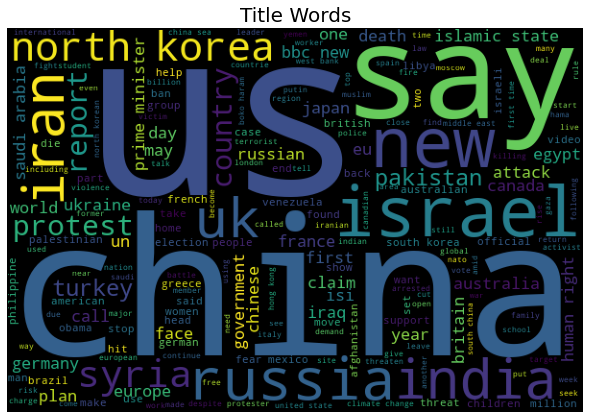

In [12]:
t_cloud = WordCloud(width=600, height=400).generate(t_words)

plt.figure(figsize=(8,6))
plt.imshow(t_cloud)
plt.axis("off")
plt.title("Title Words",fontsize=20)
plt.tight_layout(pad=0)
plt.show()

### 4) Top 20 title words <a name="subparagraph4"></a>

In [13]:
words = df.clean_title.apply(lambda x: [word.lower() for word in x.split()])
title_words = Counter()
for msg in words:
    title_words.update(msg)
    
df_title = pd.DataFrame(title_words.most_common(20),columns=['Word', 'Count'])
df_title

,Word,Count
0,us,39332
1,says,25399
2,china,24462
3,new,23267
4,syria,18263
5,russia,17395
6,police,16546
7,world,16514
8,government,15153
9,israel,14984


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

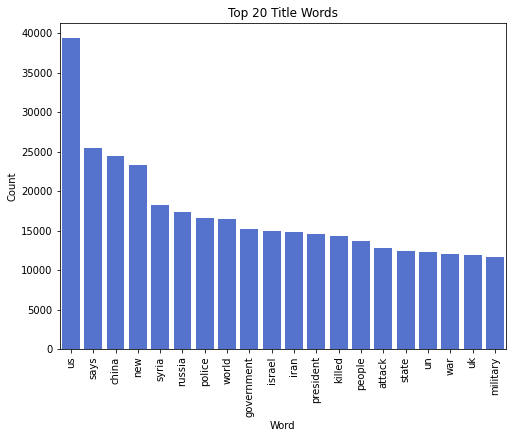

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Word', y='Count',data=df_title, ax=ax,color='royalblue')
plt.title("Top 20 Title Words")
plt.xticks(rotation='vertical')

## 2. Modeling <a name="paragraph2"></a>

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_title, df.up_votes, test_size = 0.3,random_state = 0)

### Text Prerocessing: TF-IDF <a name="subparagraph5"></a>

In [17]:
vect = CountVectorizer()
vect.fit(X_train)
vect.fit(X_test)

CountVectorizer()

In [18]:
X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)

X_test_dtm = vect.transform(X_test)

In [19]:
tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<356465x102999 sparse matrix of type '<class 'numpy.float64'>'
	with 3497761 stored elements in Compressed Sparse Row format>

### Linear Regression <a name="subparagraph6"></a>

In [20]:
lr = LinearRegression()
lr.fit(X_train_dtm, y_train)
lr_predicition = lr.predict(X_test_dtm)

mse = mean_squared_error(lr_predicition, y_test)
print(mse)

376035.8250336577


### Decision Tree <a name="subparagraph7"></a>

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5)  
dt.fit(X_train_dtm, y_train)
dt_predicition = dt.predict(X_test_dtm)

mse = mean_squared_error(dt_predicition, y_test)
print(mse)

287206.65754848346


The mean number of upvotes is 112.2, and the standard deviation is 541.7. The square root of the MSE is 613.2 in linear regression and 535.9 in decision tree. The higher square root of the MSE, the larger average error. This means decision tree performs better when using TF-IDF.